### **Importing Libraries**


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from networkx.algorithms.community.centrality import girvan_newman
from operator import mul
import networkx as nx
import os
import sys
import community.community_louvain as community
import matplotlib.image as mpimg
import matplotlib.colors as mpcolors
import matplotlib.cm as mpcm
import random
from networkx.algorithms.community.quality import modularity

### **Loading DataSet**

In [2]:
data_url = "./Dataset/Cit-HepPh.txt"
df_data_1 = pd.read_csv(data_url, sep='\t', skiprows=4, names=['FromNodeId', 'ToNodeId'], dtype={'FromNodeId': int, 'ToNodeId': int})

### **Loading Time of Release**

In [10]:
data_url = "./Dataset/cit-HepPh-dates.txt"
df_data_2 = pd.read_csv(data_url, sep='\t', skiprows=1, names=['NodeId', 'Date'], dtype={'NodeId': str, 'Date': str})
df_data_2['Date'] = pd.to_datetime(df_data_2['Date'])
graphs_by_date = {}
# Filter entries with '11' at the beginning of the 'NodeId' column
df_data_2 = df_data_2[~df_data_2['NodeId'].str.startswith('11')]
# Filter entries with leading 0's of the 'NodeId' column
df_data_2['NodeId'] = df_data_2['NodeId'].astype(str).str.lstrip('0')
df_data_2['NodeId'] = df_data_2['NodeId'].astype(int)
df_data_2 = df_data_2[df_data_2['Date'].dt.year <= 1993]
i = 0
unnodes = df_data_2['NodeId']
for nodes in unnodes:
    # print(nodes)
    i += 1
print(i)


2520


### **Merging Both DataSet**

In [11]:
df_merged = pd.merge(df_data_1, df_data_2, how='inner', left_on='FromNodeId', right_on='NodeId')
df_merged['Date'] = pd.to_datetime(df_merged['Date'])
# Filter out rows where 'ToNodeId' is not present in 'NodeId' column of df_data_2
df_merged = df_merged[df_merged['ToNodeId'].isin(df_data_2['NodeId'])]
unnodes = df_merged['FromNodeId'].unique()
i = 0
for nodes in unnodes:
    # print(node)
    i += 1
print(i)

1037


### **Creation of Graph**

In [65]:

# Construct the directed graph
G_lat = nx.from_pandas_edgelist(df_merged, 'FromNodeId', 'ToNodeId', create_using=nx.DiGraph())

print("Number of nodes:", len(G_lat.nodes()))
print("Number of edges:", len(G_lat.edges()))
print(nx.density(G_lat))


Number of nodes: 1504
Number of edges: 2862
0.001266084851573449


### **Yearly Analysis**

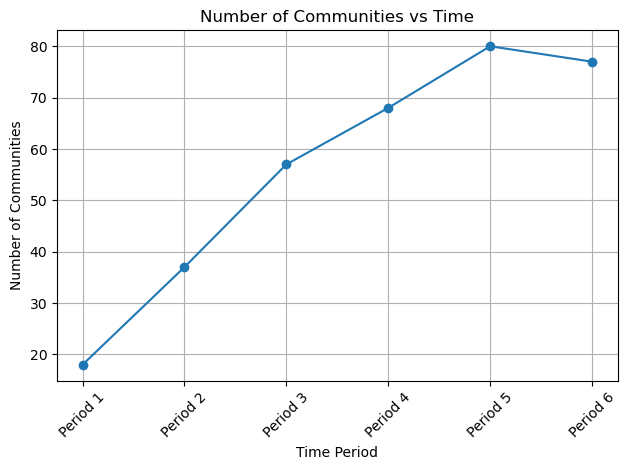

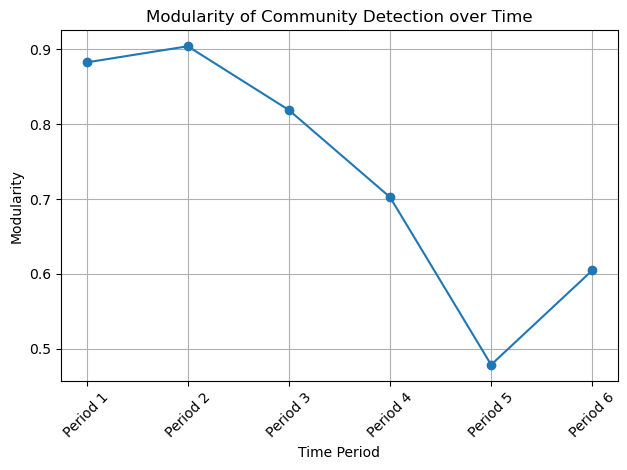

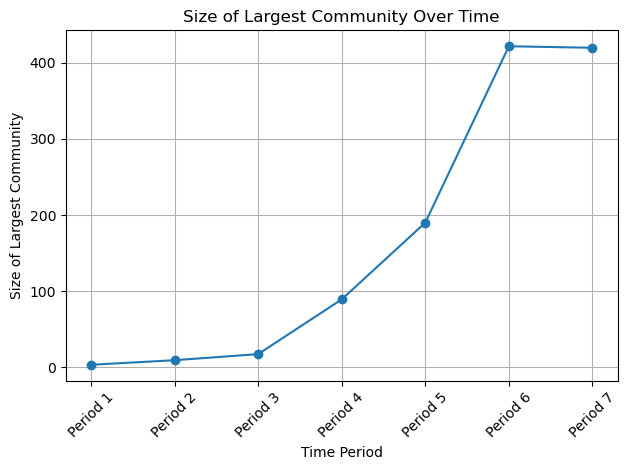

In [66]:
df_merged['Year'] = df_merged['Date'].dt.year


# Counter to keep track of processed years
flag = 0
num_communities_list = []
modularity_values = []
largest_community_sizes = []

for year in range(1992, 1994):

    month = 1
    while(month < 13):
        # Calculate the end month considering the three-month gap
        end_month = month + 2
        end_year = year
        if end_month > 12:
            end_month -= 12
            end_year += 1

        # Filter the data for the current three-month period
        filtered_data = df_merged[ (df_merged['Date'].dt.year < year) | ( (df_merged['Date'].dt.year == year) & (df_merged['Date'].dt.month >= month) & (df_merged['Date'].dt.month <= end_month))]

        if not filtered_data.empty:
            G = nx.from_pandas_edgelist(filtered_data, 'FromNodeId', 'ToNodeId', create_using=nx.DiGraph())
            inbuilt_communities_generator = girvan_newman(G, most_valuable_edge=None)
            inbuilt_communities = [c for c in next(inbuilt_communities_generator)]
            
            # Process your communities or do any other desired operations
            
            # flag += 1
            # # Assign random colors to each detected community ensuring uniqueness
            # community_colors = {}
            # used_colors = set()  # Set to store used colors
            # for i, community in enumerate(inbuilt_communities):
            #     color = "#{:06x}".format(random.randint(0, 0xFFFFFF))  # Generate a random hex color
            #     community_colors[i] = color
            #     used_colors.add(color)
            #     for node in community:
            #         G.nodes[node]['community'] = i
            #         G.nodes[node]['color'] = color

            # # Export the graph to GraphML format
            # nx.write_graphml(G, f"graph_{flag}_3months_{year}-{month}-to-{end_year}-{end_month}.graphml")
            num_communities_list.append(len(inbuilt_communities))
            # Calculate modularity
            modularity_value = modularity(G, inbuilt_communities)
            modularity_values.append(modularity_value)
            
            # Find the size of the largest community
            largest_community_size = max(len(community) for community in inbuilt_communities)
            largest_community_sizes.append(largest_community_size)

        month = end_month + 1

num_communities_list = num_communities_list[1:]

# Plotting the graph
plt.plot(range(len(num_communities_list)), num_communities_list, marker='o')
plt.xlabel('Time Period')
plt.ylabel('Number of Communities')
plt.title('Number of Communities vs Time')
plt.grid(True)
plt.xticks(ticks=range(len(num_communities_list)), labels=[f"Period {i+1}" for i in range(len(num_communities_list))], rotation=45)
plt.tight_layout()
plt.show()
# plt.savefig("Com_Num.png")
# plt.clf()

modularity_values = modularity_values[1:]

# Plotting modularity over time
plt.plot(range(len(modularity_values)), modularity_values, marker='o')
plt.xlabel('Time Period')
plt.ylabel('Modularity')
plt.title('Modularity of Community Detection over Time')
plt.grid(True)
plt.xticks(ticks=range(len(modularity_values)), labels=[f"Period {i+1}" for i in range(len(modularity_values))], rotation=45)
plt.tight_layout()
plt.show()
# plt.savefig("Com_Mod.png")
# plt.clf()


larlargest_community_sizes =largest_community_sizes[1:]

# Plotting the size of the largest community over time
plt.plot(range(len(largest_community_sizes)), largest_community_sizes, marker='o')
plt.xlabel('Time Period')
plt.ylabel('Size of Largest Community')
plt.title('Size of Largest Community Over Time')
plt.grid(True)
plt.xticks(ticks=range(len(largest_community_sizes)), labels=[f"Period {i+1}" for i in range(len(largest_community_sizes))], rotation=45)
plt.tight_layout()
plt.show()
# plt.savefig("Com_Lar.png")
